# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We **do not have access to the labels** for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a **generative model that has been trained to produce realistic-looking MRI images** of patient's heads. Using this model, you will **create an appropriate dataset to train your architecture**. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The **corrupted images** that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [1]:
import os
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# INSTRUCTIONS:
# Open in a BROWSER https://drive.google.com/file/d/1I8Ry7Z_QqnlARwOuDgN4NPCd-GcLw1OC/view?usp=drive_link
# Download the file cw1_files.zip
# Go to https://drive.google.com/ and log in with the account you will be using for this coursework
# In the folder 'My Drive' upload cw1_files.zip (DO NOT UNZIP THE FILE)
# Run the following:

!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Cloning the repository from https://github.com/dpelacani/InverseLDM.git...
Cloning into 'InverseLDM'...
remote: Enumerating objects: 1331, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 1331 (delta 167), reused 182 (delta 100), pack-reused 1070 (from 1)
Receiving objects: 100% (1331/1331), 467.16 KiB | 10.86 MiB/s, done.
Resolving deltas: 100% (875/875), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 M

### Q1.1 Display 10 of the generated data

Generate realistic MRI images using the generator, save them, and visualize them.

In [4]:
from ese_invldm import generate
import numpy as np

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""



### 1. Parameters setting
#### 回来改这个！！！！
num_samples = 100
num_inference_steps = 50 ### exploring the range from 10 to 50.
batch_size = 10
scheduler = "ddim"   ### try ddpm as well
temperature = 1.0  #### try this
seed = 42

### 2. Generate images
generated_images = generate(
    num_samples=num_samples,
    num_inference_steps=num_inference_steps,
    batch_size=batch_size,
    scheduler=scheduler,
    temperature=temperature,
    seed=seed
)


Batch 0


100%|██████████| 50/50 [00:05<00:00,  9.09it/s]


Batch 1


100%|██████████| 50/50 [00:05<00:00,  9.29it/s]


Batch 2


100%|██████████| 50/50 [00:05<00:00,  9.22it/s]


Batch 3


100%|██████████| 50/50 [00:05<00:00,  9.22it/s]


Batch 4


100%|██████████| 50/50 [00:05<00:00,  9.09it/s]


Batch 5


100%|██████████| 50/50 [00:05<00:00,  8.94it/s]


Batch 6


100%|██████████| 50/50 [00:06<00:00,  7.86it/s]


Batch 7


100%|██████████| 50/50 [00:05<00:00,  9.19it/s]


Batch 8


100%|██████████| 50/50 [00:05<00:00,  9.17it/s]


Batch 9


100%|██████████| 50/50 [00:05<00:00,  9.16it/s]


TypeError: Invalid shape (10, 64, 64) for image data

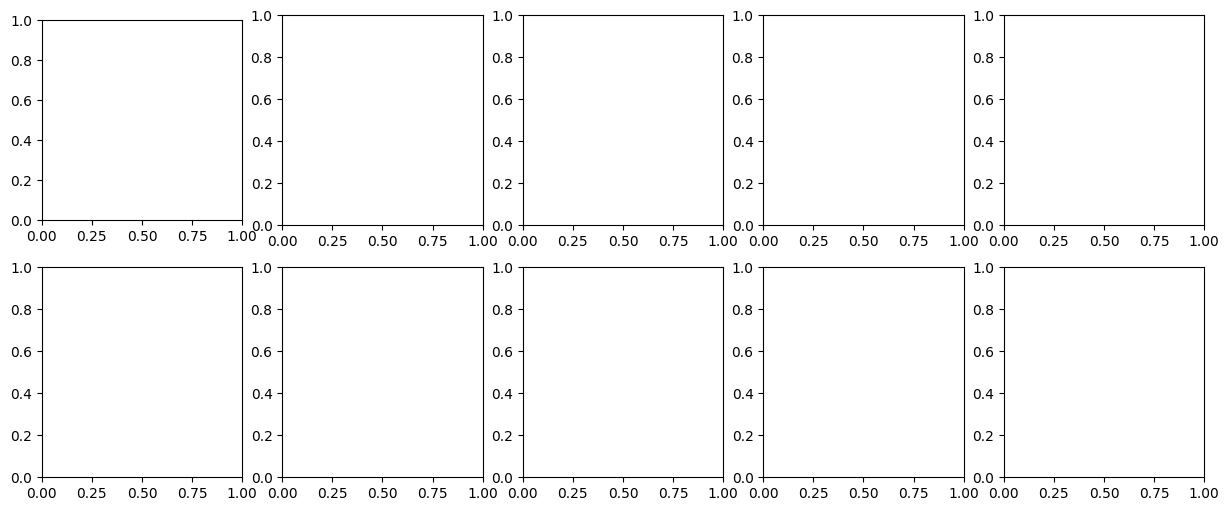

In [19]:
### 3. Visualize 10 generated images directly
import matplotlib.pyplot as plt

# Create a grid for displaying the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns for 10 images

for idx, ax in enumerate(axes.flat):  # Flatten the 2D grid of axes
    # Move to CPU, convert to NumPy, and remove the channel dimension
    img = generated_images[idx].cpu().numpy().squeeze()  # Squeeze to remove the (1, 64, 64) to (64, 64)

    # Display the image
    ax.imshow(img, cmap="gray")  # Grayscale colormap
    ax.set_title(f"Image {idx}")  # Add a title for each image
    ax.axis("off")  # Remove axis ticks and labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### Q1.2 Load and display the corrupted images

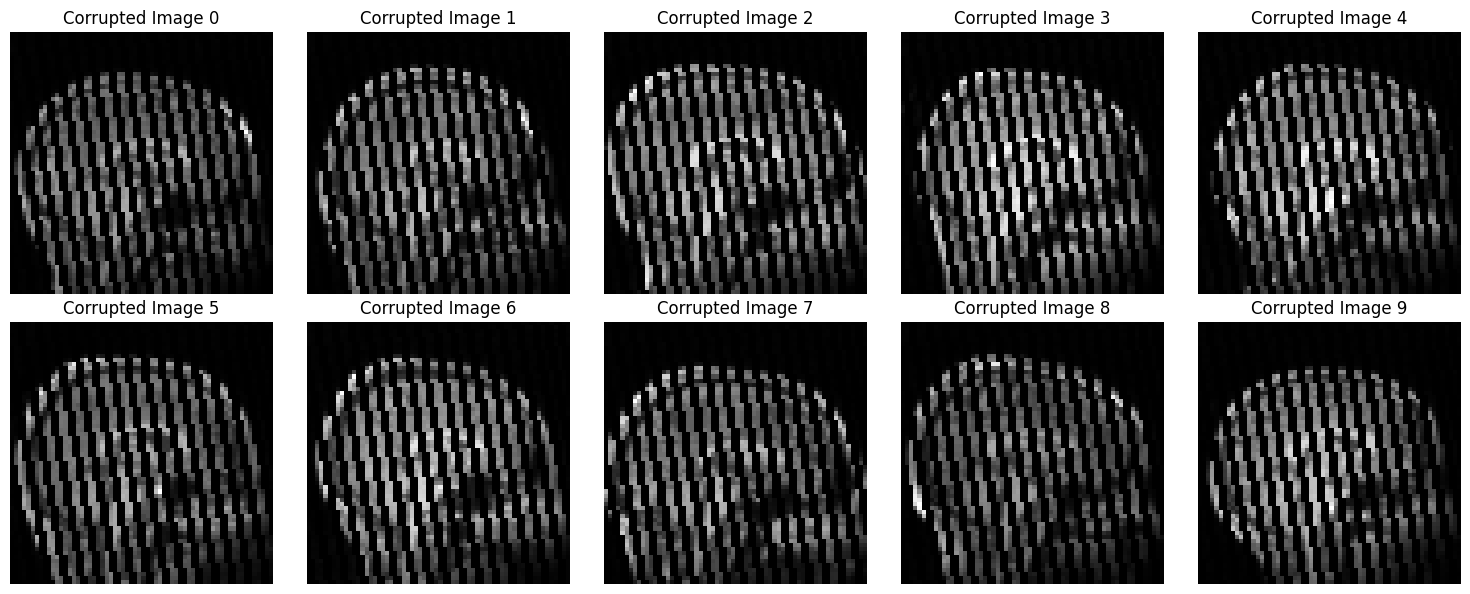

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 4. Load corrupted images from test_set.npy and visualize
# Load the corrupted images from the provided test set
test_set = np.load("test_set.npy")


### 5. Plot 10 corrupted images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, ax in enumerate(axes.flat):  # Flatten the 2D grid of axes
    corrupted_img = test_set[idx].squeeze()  # Remove the extra dimension
    ax.imshow(corrupted_img, cmap="gray")
    ax.set_title(f"Corrupted Image {idx}")
    ax.axis("off")  # Remove axis ticks and labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



### Q2.1 Add correpution to the generated data

1. Add random noise (e.g., Gaussian noise).
2. Apply blurring (e.g., Gaussian blur).
3. Mask random regions of the image.
4. The goal is to mimic the corruption seen in test_set.npy

In [ ]:
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter
import numpy as np

def corrupt_image(image):
    # Add random noise
    noisy_img = random_noise(image, mode='gaussian', var=0.02)
    # Apply Gaussian blur
    blurred_img = gaussian_filter(noisy_img, sigma=1)
    return blurred_img

# Corrupt generated images
corrupted_images = []
for idx in range(len(generated_images)):
    corrupted_img = corrupt_image(generated_images[idx])
    corrupted_images.append(corrupted_img)

# Save corrupted and original images as a training dataset
np.save("training_corrupted.npy", np.array(corrupted_images))
np.save("training_original.npy", np.array(generated_images))


### Q2.2 Create a PyTorch TensorDataset and DataLoader:

- Use the training_corrupted.npy (corrupted images) as the input.
- Use training_original.npy (original generated images) as the label.

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load datasets
training_corrupted = np.load("training_corrupted.npy")
training_original = np.load("training_original.npy")

# Convert to PyTorch tensors
X_train = torch.tensor(training_corrupted, dtype=torch.float32)
Y_train = torch.tensor(training_original, dtype=torch.float32)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


### Q2.3 Prepare Test Dataset

- Load the provided corrupted images (test_set.npy).
- Create a TensorDataset and DataLoader for the test set.
- Since no labels are available, the test_loader will contain only the corrupted images.

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load test set
test_set = np.load("test_set.npy")

# Convert to PyTorch tensors
X_test = torch.tensor(test_set, dtype=torch.float32)

# Create TensorDataset and DataLoader
test_dataset = TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


### Q2.4 Visualize 10 Training and Test Images
- Display 10 corrupted and their corresponding uncorrupted images from the training set.
- Display 10 images from the test set.


In [ ]:
# Visualize training images
for idx in range(10):
    corrupted = X_train[idx].numpy()
    original = Y_train[idx].numpy()

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(corrupted, cmap="gray")
    plt.title("Corrupted Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(original, cmap="gray")
    plt.title("Uncorrupted Image (Label)")
    plt.axis("off")

    plt.show()

# Visualize test images
for idx in range(10):
    corrupted = X_test[idx].numpy()

    plt.imshow(corrupted, cmap="gray")
    plt.title("Test Set Image")
    plt.axis("off")
    plt.show()


<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


<br>

---

<br>